In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('spam_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
nb_predictions = naive_bayes_classifier.predict(X_test)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate Naive Bayes Classifier
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:")
print(classification_report(y_test, nb_predictions))

# Evaluate KNN Classifier
print("KNN Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))


Naive Bayes Classifier:
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

KNN Classifier:
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



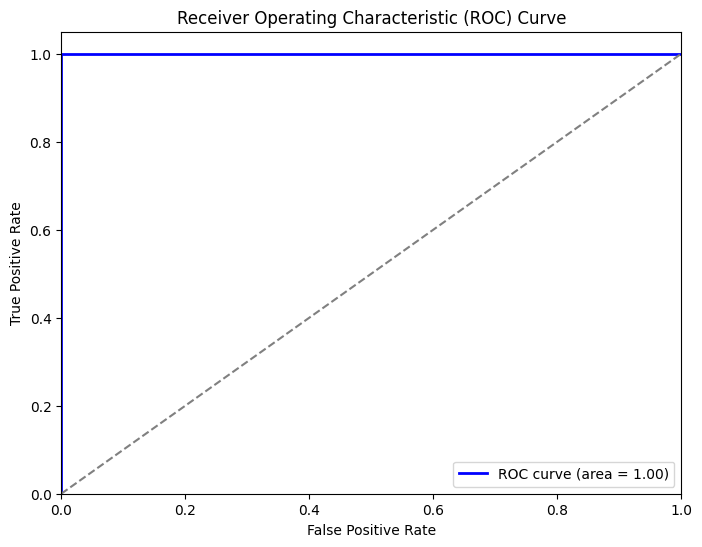

AUC Score: 1.0


In [4]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test data
data = {
    'win': [1, 0, 0, 0, 1, 0, 1, 0, 0],
    'click': [1, 1, 0, 0, 0, 0, 0, 1, 0],
    'team': [0, 1, 0, 1, 0, 0, 1, 1, 0],
    'claim': [0, 0, 1, 0, 0, 1, 0, 0, 1],
    'reminder': [0, 0, 0, 1, 0, 1, 0, 0, 0],
    'Category': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam']
}

# Create a DataFrame from the test data
df = pd.DataFrame(data)

# Prepare the features (X) and labels (y)
X = df[['win', 'click', 'team', 'claim', 'reminder']]
y = df['Category'].apply(lambda x: 1 if x == 'Spam' else 0)

# Create a Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X, y)

# Predict probabilities
predictions_proba = classifier.predict_proba(X)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, predictions_proba)
auc_score = roc_auc_score(y, predictions_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC score
print("AUC Score:", auc_score)
